In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy as st
from pathlib import Path
import json
import requests


In [2]:
#Creating path

csvpath1= Path("Resources/nba.csv")
csvpath2= Path("Resources/Playoffs.csv")
csvpath3= Path("Resources/Regular_Season.csv")

#Reading the csv files 

nba_df= pd.read_csv(csvpath1)
playoffs_df= pd.read_csv(csvpath2)
reg_season_df= pd.read_csv(csvpath3)

In [3]:
#Renaming columns in nba_df, playoffs_df and reg_season_df

nba_df= nba_df.rename(columns={"PLAYER_ID": "Player_ID", "GP": "Games played", "MIN": "Minutes Played", 
                               "PTS": "Points","RANK": "Rank", "PLAYER": "Player", "TEAM_ID": "Team_ID",
                                 "TEAM":"Team","year": "Year"})

playoffs_df= playoffs_df.rename(columns={"PLAYER_ID": "Player_ID", "GP": "Games played", "MIN": "Minutes Played", 
                               "PTS": "Points","RANK": "Rank", "PLAYER": "Player", "TEAM_ID": "Team_ID",
                                 "TEAM":"Team","year": "Year"})

reg_season_df= reg_season_df.rename(columns={"PLAYER_ID": "Player_ID", "GP": "Games played", "MIN": "Minutes Played", 
                               "PTS": "Points","RANK": "Rank", "PLAYER": "Player", "TEAM_ID": "Team_ID",
                                 "TEAM":"Team","year": "Year"})


In [4]:
#checking for null values in the 3 dfs

nullone= pd.isnull(nba_df)
nulltwo= pd.isnull(playoffs_df)
nullthree= pd.isnull(reg_season_df)

# Dropping any null values

nba_df= nba_df.dropna()
playoffs_df= playoffs_df.dropna()
reg_season_df= reg_season_df.dropna()

# No null values found and dropped

In [5]:
# Dropping the first column in playoffs_df and first 2 columns in reg_season_df 

playoffs_df = playoffs_df.drop("Unnamed: 0.1", axis=1)
reg_season_df= reg_season_df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)


# Replacing "Regular%20Season" value in season_type column in  nba_df to "Regular"

nba_df['Season_type'] = nba_df['Season_type'].replace('Regular%20Season', 'Regular')


# Replacing "Regular_Season" value in season_type column in reg_seasons_df to "Regular"

reg_season_df['Season_type'] = reg_season_df['Season_type'].replace('Regular_Season', 'Regular')

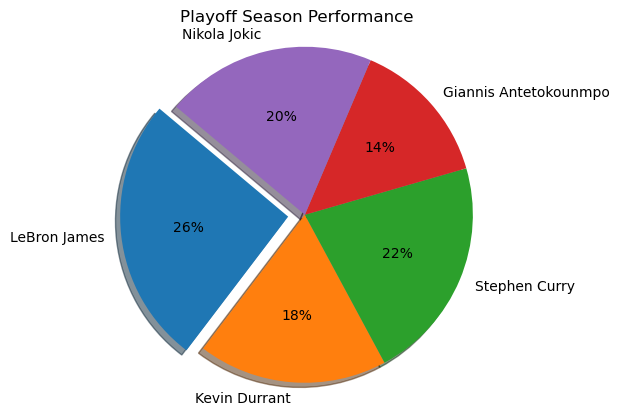

<Figure size 640x480 with 0 Axes>

In [6]:
# Question 1: What is the difference in performance of the top 5 players in regular and playoff seasons?
# Show their comparison.  

#Finding the players with number 1 rank in the nba_dataset
ranks= nba_df.loc[nba_df["Rank"]==1]

#Choosing 5 random players from ranks.
 
top_5= ["LeBron James", "Kevin Durrant", "Stephen Curry", "Giannis Antetokounmpo", "Nikola Jokic"]

#3 offensive metrics (Points, AST, FGA) AND 3 defensive metrics (REB,STL,BLK)
performance_metrics= ["PTS", "AST", "FGA", "REB", "STL", "BLK"]

#PLAYOFFS SEASON CALCULATION FOR TOP 5 PLAYERS 
# We look up each players 5 performance metrics as mentioned above. Then calculated the horizontal average across those 6 columns
# and created a new column to store that calculation with the name of Average Stats. 

LeBron_James = playoffs_df.loc[playoffs_df['Player'] == 'LeBron James', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
LeBron_James['Average Stats'] = LeBron_James[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
lebron= LeBron_James['Average Stats'].mean()

Kevin_Durrant = playoffs_df.loc[playoffs_df['Player'] == 'Kevin Durant', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
Kevin_Durrant['Average Stats'] = Kevin_Durrant[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
kevin= Kevin_Durrant['Average Stats'].mean()


stephen_curry = playoffs_df.loc[playoffs_df['Player'] == 'Stephen Curry', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
stephen_curry['Average Stats'] = stephen_curry[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
curry= stephen_curry['Average Stats'].mean()

Giannis_Antetokounmpo = playoffs_df.loc[playoffs_df['Player'] == 'Giannis Antetokounmpo', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
Giannis_Antetokounmpo['Average Stats'] = Giannis_Antetokounmpo[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
giannis= Giannis_Antetokounmpo['Average Stats'].mean()


Nikola_Jokic =playoffs_df.loc[playoffs_df['Player'] == 'Nikola Jokic', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
Nikola_Jokic['Average Stats'] = Nikola_Jokic[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
nikola= Nikola_Jokic['Average Stats'].mean()

performance= [lebron, kevin, curry, giannis, nikola]
explode= [0.1,0,0,0,0]

plt.pie(performance, explode=explode, labels=top_5,
        autopct="%1.0f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.title("Playoff Season Performance")
plt.show()
plt.savefig("Figures/Playoff_Season_Performance_Top5.png")
plt.show()


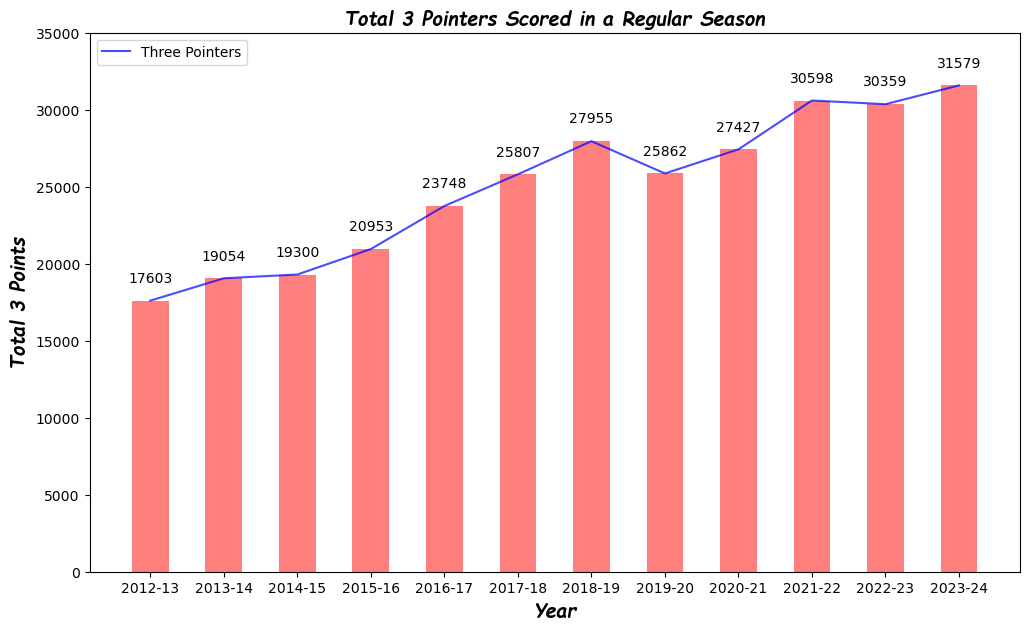

In [39]:
# Question 2: How 3 pointers in both season types over years 2012-2024 changed the scoring trends of NBA? 

# Calculating Three Pointers Points for Regular Season
reg_year = reg_season_df['Year'].unique()  # reg_year is the unique years for the regular season

reg_year_grouped = reg_season_df.groupby('Year')  # reg_year_grouped is the grouped years. The result is a DataFrameGroupBy object.

reg_three_points = reg_year_grouped['FG3M'].sum()  # reg_three_points is the total number of three-pointers scored in a regular season.

reg_three_df = pd.DataFrame(reg_three_points)

# 1st visualization: Total Three-pointers scored in Regular Season.

plt.figure(figsize=(12, 7))
plt.plot(reg_year, reg_three_df['FG3M'], label='Three Pointers', color='b', alpha = 0.7)
plt.bar(reg_year, reg_three_df['FG3M'], color='r', alpha=0.5, width=0.5)

for i, value in enumerate(reg_three_df['FG3M']):
    plt.text(i, value + 1000, str(value), ha = 'center', va = 'bottom')

plt.xlabel('Year', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontstyle': 'italic', 'family': 'cursive'})
plt.ylabel('Total 3 Points', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontstyle': 'italic', 'family': 'cursive'})
plt.title('Total 3 Pointers Scored in a Regular Season', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontstyle': 'italic', 'family': 'cursive'})
plt.legend().set_loc('upper left')
plt.ylim(0, 35000)
plt.savefig("Figures/Total_3_Pointers_Scored_in_a_Regular_Season.png")
plt.show()
# In this corrected version, I have added label='Three Pointers' within the plt.plot() function to specify the label for the line plot.
# Then, I have included plt.legend() without any arguments to ensure that the legend includes the label specified in the plt.plot() function.

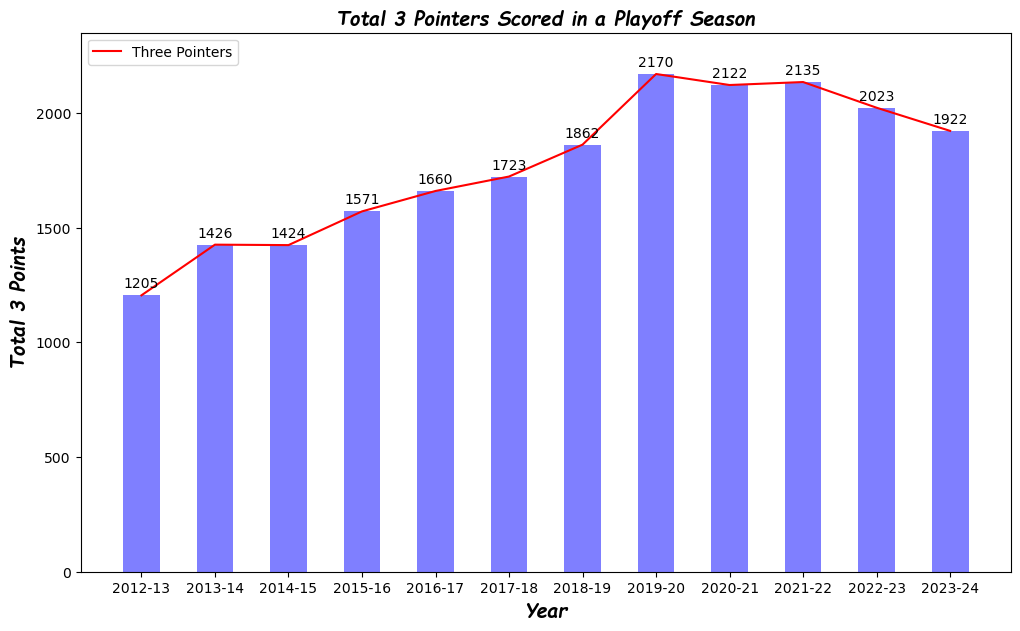

In [35]:
# Calculating Three Pointers Points for Playoffs Season

po_year = playoffs_df['Year'].unique()                      # po_year is the unique years for playoffs season

po_year_grouped = playoffs_df.groupby('Year')               # po_year_grouped is the grouped years. The result is DataFrameGroupBy object.

po_three_points = po_year_grouped['FG3M'].sum()             # po_three_points is the total number of three pointers scored in a playoffs season.

po_three_df = pd.DataFrame(po_three_points)

# 2nd visualization: Total Three pointers scored in Playoffs Season.

plt.figure(figsize=(12,7))
plt.plot(po_year, po_three_df['FG3M'], label='Three Pointers', color = 'r')
plt.bar(po_year, po_three_df['FG3M'], color= 'b', alpha = 0.5, width = 0.5)

for j, value in enumerate(po_three_df['FG3M']):
    plt.text(j, value+20, str(value), ha = 'center', va = 'bottom')

plt.xlabel('Year', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontstyle': 'italic', 'family': 'cursive'})
plt.ylabel('Total 3 Points', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontstyle': 'italic', 'family': 'cursive'})
plt.legend().set_loc('upper left')
plt.title('Total 3 Pointers Scored in a Playoff Season', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontstyle': 'italic', 'family': 'cursive'})
plt.savefig("Figures/Total 3 Pointers Scored in a Playoff Season.png")
plt.ylim(0, 2350)
plt.show()

In [48]:
# Comparing Three pointers based on regular Season
reg_three_sum = reg_three_df['FG3M'].sum()
reg_three_total = reg_three_sum*3
reg_total_points = reg_season_df['Points'].sum()
reg_avg_three_pct = reg_three_total/reg_total_points*100
reg_avg_three_pct

29.081061884045102

In [50]:
# Three pointers percentage for Playoff Seasons
po_three_sum = playoffs_df['FG3M'].sum()
po_three_total = po_three_sum*3
po_total_points = playoffs_df['Points'].sum()
po_avg_three_pct = po_three_total/po_total_points*100
po_avg_three_pct

30.33645286898902